# Raven - Intuition Building

Available arrays in the file: ['image', 'target', 'predict', 'meta_matrix', 'meta_target', 'structure', 'meta_structure']


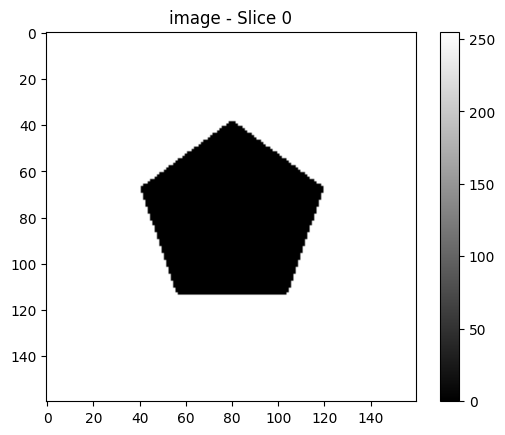

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Load the RAVEN dataset file
data_path = '/Users/andylee/Projects/raven-cvpr/output/center_single/RAVEN_0_train.npz'
data = np.load(data_path)

# Print available arrays in the file
print("Available arrays in the file:", list(data.keys()))

# Visualize a specific array
array_names = ['image', 'target', 'predict', 'meta_matrix', 'meta_target', 'structure', 'meta_structure']
array_name = 'image'  # Replace with the actual array name you want to visualize
array_data = data[array_name]

# Check if the array is 2D or 3D
if array_data.ndim == 2:
    plt.imshow(array_data, cmap='gray')
    plt.title(array_name)
    plt.colorbar()
    plt.show()
elif array_data.ndim == 3:
    # If it's a 3D array, you might want to visualize a specific slice
    slice_index = 0  # Change this to visualize different slices
    plt.imshow(array_data[slice_index], cmap='gray')
    plt.title(f"{array_name} - Slice {slice_index}")
    plt.colorbar()
    plt.show()
else:
    print(f"Array {array_name} has {array_data.ndim} dimensions, which might not be directly visualizable.")

## Dislay Raven matrices
I ran the example generation script to generate Raven puzzles and this is a way to visualize them.

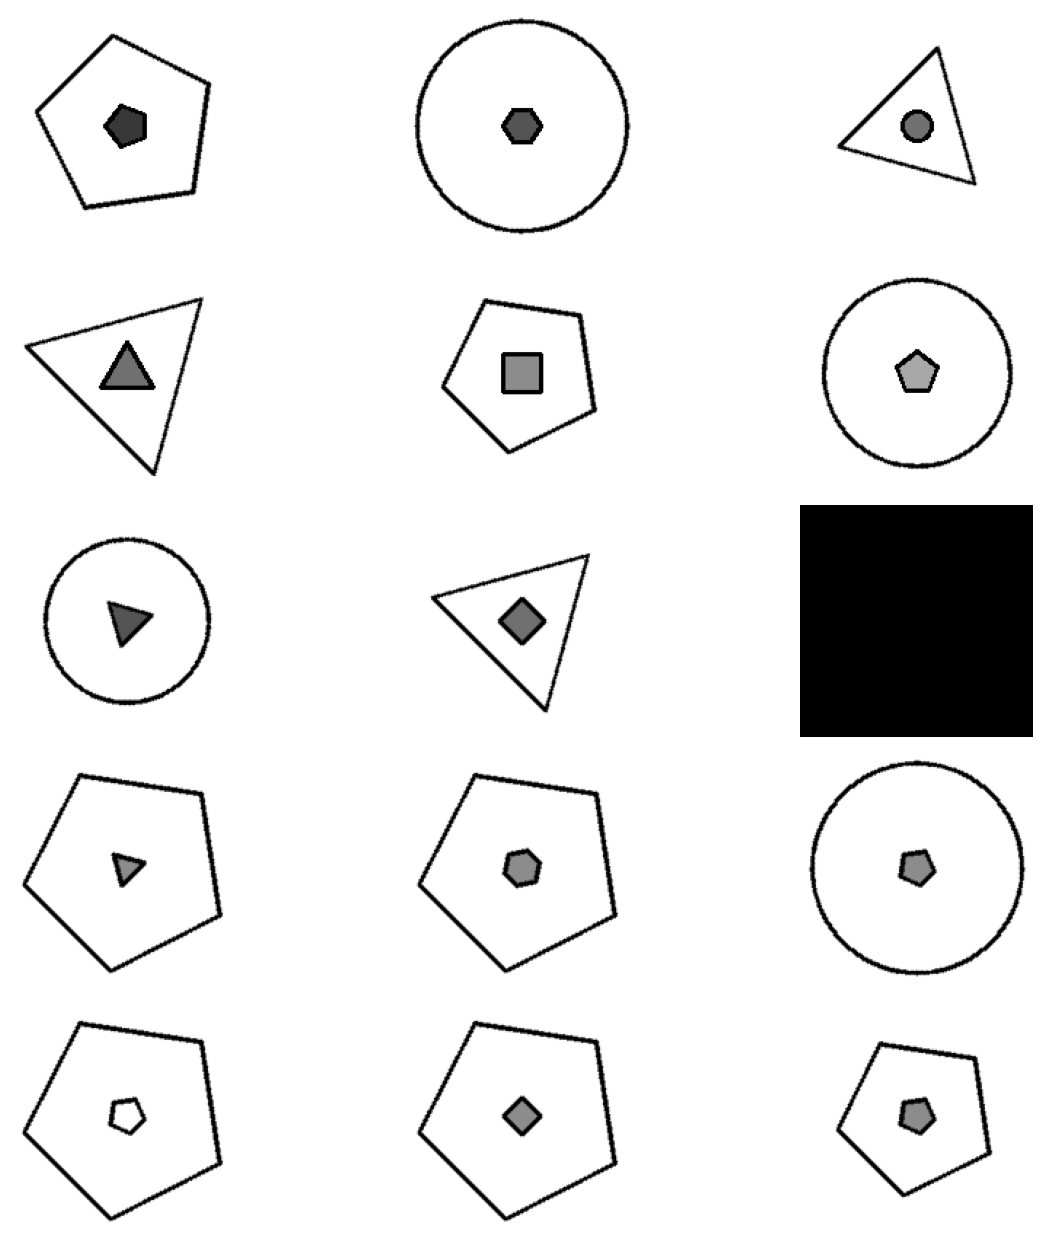

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Load the .npz file
npz_file = "/Users/andylee/Projects/raven-cvpr/output/RAVEN_66_test.npz"
data = np.load(npz_file)

# Get the image data (contains all 16 panels)
image_data = data['image']

# Visualize the complete problem
plt.figure(figsize=(12, 15))

# Create the 3×3 problem matrix (first 8 panels + blank)
for i in range(3):
    for j in range(3):
        idx = i * 3 + j
        if idx < 8:  # First 8 panels
            plt.subplot(6, 3, i * 3 + j + 1)
            plt.imshow(image_data[idx], cmap='gray')
            plt.axis('off')
        else:  # The blank panel (bottom right of the problem matrix)
            plt.subplot(6, 3, 9)
            plt.imshow(np.ones((160, 160)) * 255, cmap='gray')
            plt.axis('off')

# Create the 2×4 answer choices (last 8 panels)
for i in range(2):
    for j in range(4):
        idx = 8 + i * 4 + j  # Start from index 8
        plt.subplot(6, 3, 3 * (i + 3) + (j % 3) + 1)
        plt.imshow(image_data[idx], cmap='gray')
        plt.axis('off')

plt.tight_layout()
plt.show()

## Panel Intuition
Panels are single visuals and represent a single AoT (And-Or-Tree). The code below starts with simple panels and slowly builds them up to build intuition. 

In [2]:

import sys
import os
import copy

# temporary hack to enable us to get access to raven-cvpr code
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
sys.path.append('/Users/andylee/Projects/raven-cvpr/src/dataset')


# Import necessary modules
from const import IMAGE_SIZE, NUM_VALUES
from Attribute import Number, Position, Type, Uniformity
from AoT import Root, Structure, Component, Layout, Entity
from Rule import Progression, Rule_Wrapper, Rule
from rendering import render_panel
from build_tree import (build_center_single,
                        build_distribute_four,
                        build_in_distribute_four_out_center_single,
                        build_left_center_single_right_center_single)
import matplotlib.pyplot as plt
import numpy as np

def visualize_panel(panel):
    
    # Render the panel
    panel_img = render_panel(panel)
    
    # Display the image
    plt.figure(figsize=(8, 8))
    plt.imshow(panel_img, cmap='gray')
    plt.title("Tree structure")
    plt.axis('off')
    plt.show()


def build_single_entity(position_value, layout_entity_constraint):
    entity = Entity(name="0", bbox=position_value, entity_constraint=layout_entity_constraint)
    entity.type.value_level = 1 # Controls shape
    entity.size.value_level = 4  # Medium size
    entity.color.value_level = 2  # Black
    return entity

def count_entities(panel):
    """Return the number of entities in the panel"""
    total_entities = 0
    structure = panel.children[0]
    for component in structure.children:
        layout = component.children[0]
        entities = layout.children
        total_entities += len(entities)
    return total_entities


Entities in single panel: 1


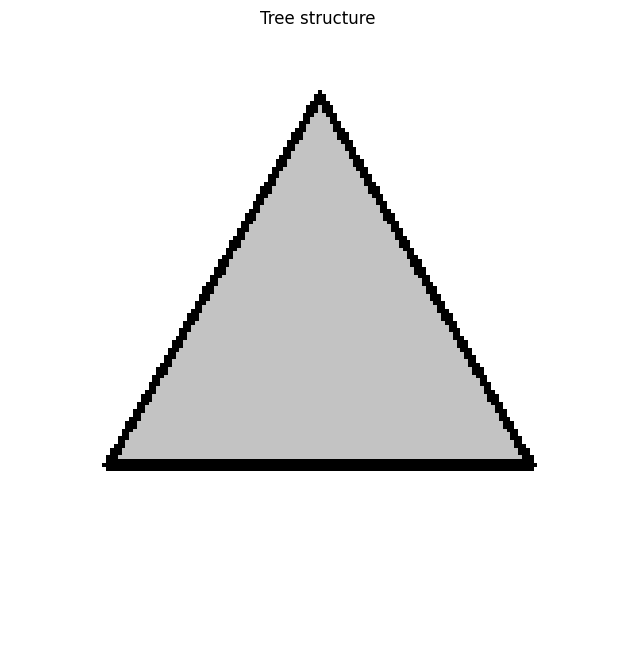

In [20]:


def build_one_shape_panel():
    # Build a center_single tree
    # tree = build_center_single()
    tree = build_center_single()
    
    # Make sure it's properly set up for rendering
    tree.is_pg = True
    
    # Find the entity in the tree
    structure = tree.children[0]  # First child of root is Structure
    component = structure.children[0]  # First child of Structure is Layout
    layout = component.children[0]  # First child of Layout is Entity

    # Set up the number and position
    layout.number.value_level = 3  # One entity
    layout.position.sample(1)  # Sample 1 position
    
    # Step 3: Create the entity (triangle)
    position_values = layout.position.get_value()
    position_value = position_values[0]
    layout_entity_constraint = layout.entity_constraint
    entity = build_single_entity(position_value, layout_entity_constraint)

    # Step 4: Add the entity to the layout
    layout.insert(entity)
    return tree

    
# Run the example
single_panel = build_one_shape_panel()
print(f"Entities in single panel: {count_entities(single_panel)}")
visualize_panel(single_panel)

Total structures:  1
Total components:  2
Entities in two shape panel: 2


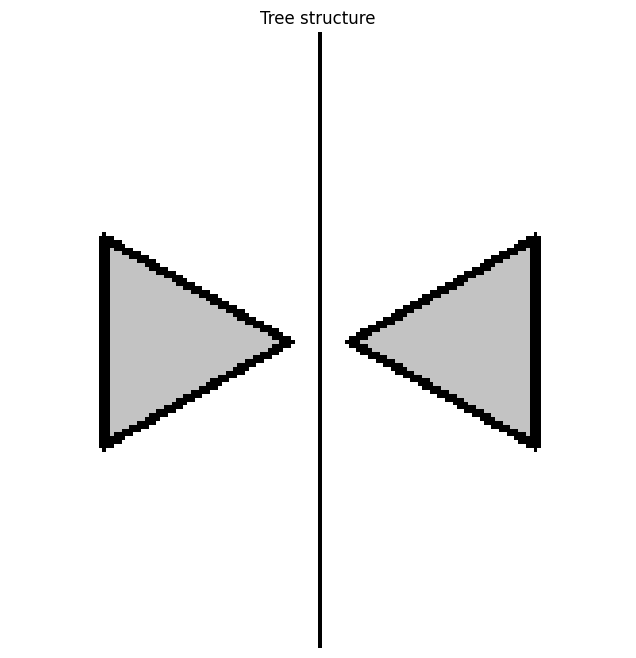

In [21]:
def build_two_shape_panel():
    # Build a center_single tree
    tree = build_left_center_single_right_center_single()
    # tree = build_in_distribute_four_out_center_single()
    
    # Make sure it's properly set up for rendering
    tree.is_pg = True
    
    # Access the nodes of the trees
    print("Total structures: ", len(tree.children))
    structure = tree.children[0]  # First child of root is Structure

    print("Total components: ", len(structure.children))
    left_component = structure.children[0]  
    right_component = structure.children[1]  

    left_layout = left_component.children[0]
    right_layout = right_component.children[0]

    # Set up the number and position
    left_layout.number.value_level = 0  # One entity in left layout
    left_layout.position.sample(1)  # Sample 1 position
    right_layout.number.value_level = 0  # One entity
    right_layout.position.sample(1)  # Sample 1 position
    
    # Step 3: Create the entity (triangle)
    left_position_values = left_layout.position.get_value()
    left_layout_entity_constraint = left_layout.entity_constraint
    left_entity = build_single_entity(left_position_values[0], left_layout_entity_constraint)
    left_layout.insert(left_entity)

    right_position_values = right_layout.position.get_value()
    right_layout_entity_constraint = right_layout.entity_constraint
    right_entity = build_single_entity(right_position_values[0], right_layout_entity_constraint)
    right_layout.insert(right_entity)

    # print("Total layouts (left): ", len(left_layout.children))
    # print("Total layouts (right): ", len(right_layout.children))
    # left_layout = left_component.children[0]  # First child of Layout is Entity
    # right_layout = right_component.children[0]  # First child of Layout is Entity

    # Set up the number and position
    return tree

two_shape_panel = build_two_shape_panel()
print(f"Entities in two shape panel: {count_entities(two_shape_panel)}")
visualize_panel(two_shape_panel)

Total structures:  1
Total components:  1
Total layouts:  1
Total Position values:  4
Entities in four shape panel: 4


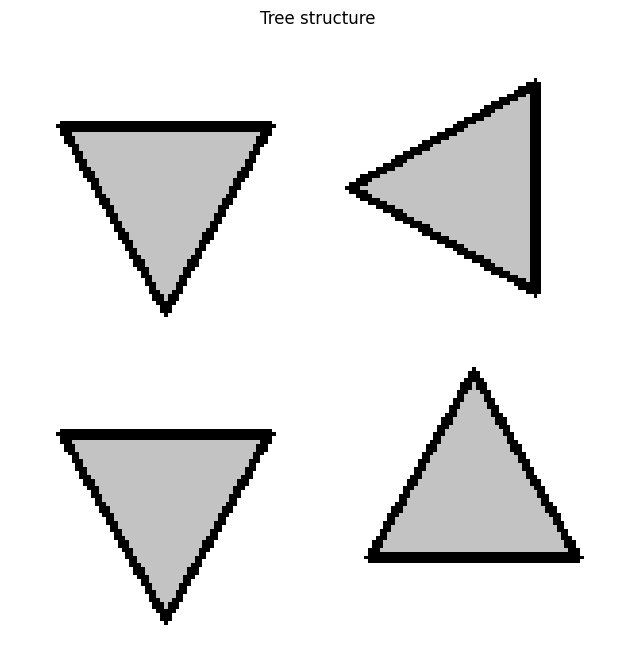

In [22]:
def build_four_shape_panel():
    # Build a center_single tree
    tree = build_distribute_four()
    
    # Make sure it's properly set up for rendering
    tree.is_pg = True
    
    # Access the nodes of the trees
    print("Total structures: ", len(tree.children))
    structure = tree.children[0]  # First child of root is Structure

    print("Total components: ", len(structure.children))
    component = structure.children[0]

    print("Total layouts: ", len(component.children))
    layout = component.children[0]

    # Handle 4 positions
    layout.number.value_level = 3 # 4 entities (0-index)
    layout.position.sample(4)

    # Get positions & constraints
    position_values = layout.position.get_value()
    layout_entity_constraint = layout.entity_constraint
    print("Total Position values: ", len(position_values))

    # Build 4 entities
    for i in range(len(position_values)):
        position_value = position_values[i]
        entity = build_single_entity(position_value, layout_entity_constraint)
        layout.insert(entity)

    return tree

panel = build_four_shape_panel()
print(f"Entities in four shape panel: {count_entities(panel)}")
visualize_panel(panel)
    

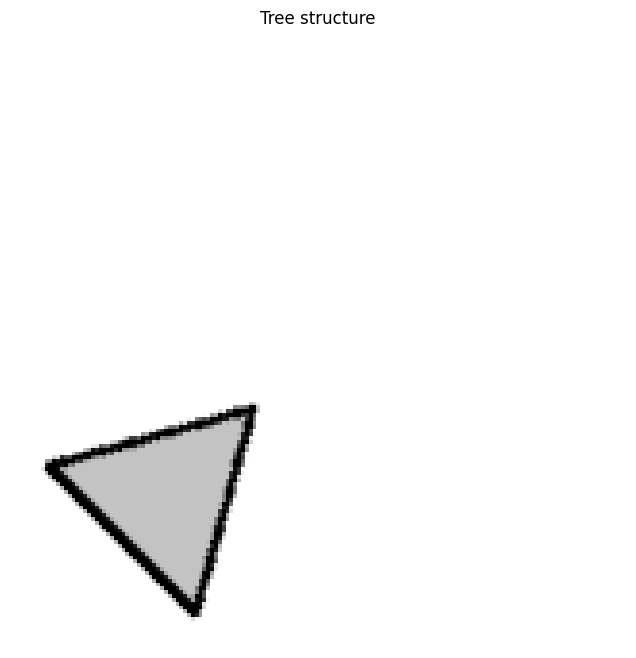

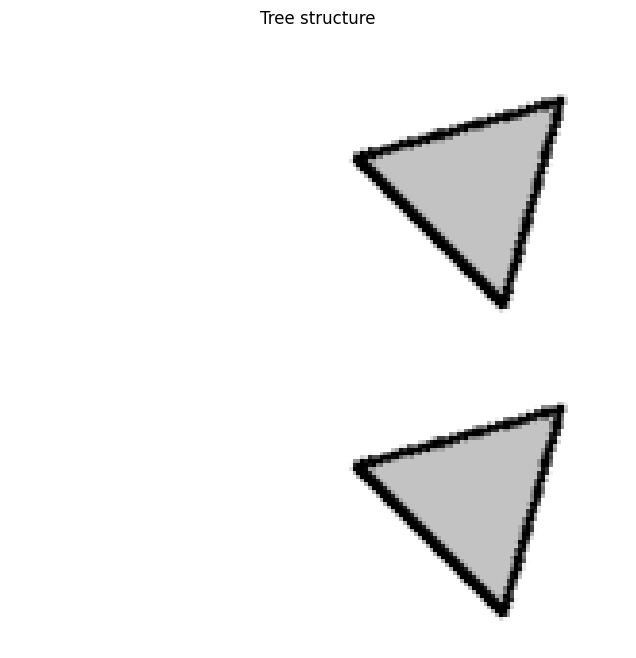

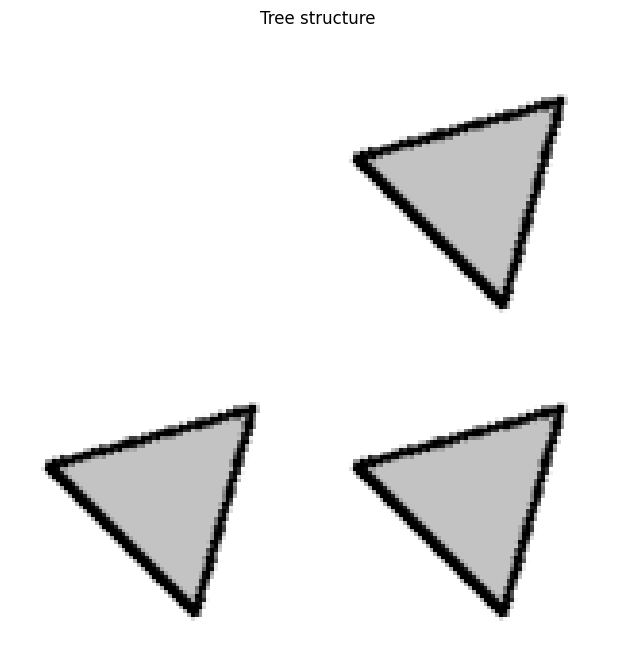

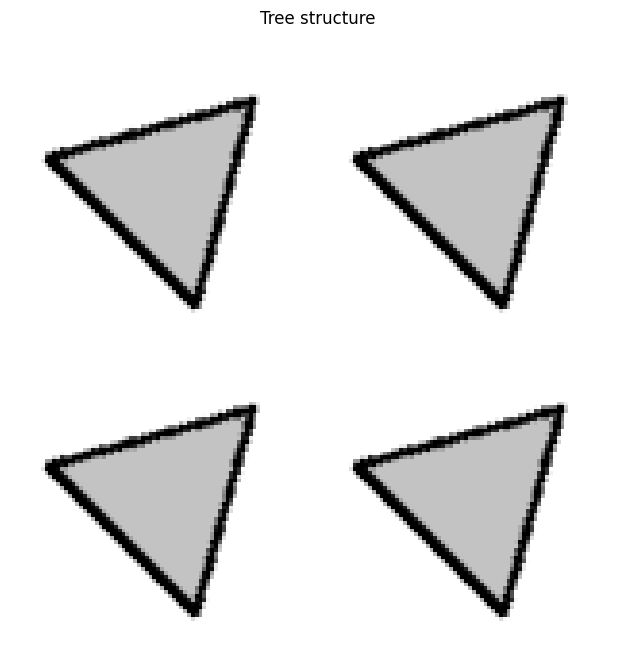

In [9]:

def build_first_panel():
    # 1. Start with a panel that CAN hold multiple entities
    # We'll use distribute_four which supports up to 4 entities
    tree = build_distribute_four()
    
    # Make sure it's properly set up for rendering
    tree.is_pg = True
    
    # Access the nodes of the trees
    structure = tree.children[0]  # First child of root is Structure
    component = structure.children[0]
    layout = component.children[0]

    # Handle 4 positions
    layout.number.value_level = 0 # 4 entities (0-index)
    layout.position.sample(4)

    # Get positions & constraints
    position_values = layout.position.get_value()
    layout_entity_constraint = layout.entity_constraint

    # Add just 1 entity
    position_value = position_values[0]
    entity = build_single_entity(position_value, layout_entity_constraint)
    layout.insert(entity)

    return tree

def build_two_panels_progression():

    # Build the first panel
    panel1 = build_first_panel()

    number_rule = Rule_Wrapper("Progression", "Number", [1], 0)
    panel2 = number_rule.apply_rule(panel1)

    return panel1, panel2

# Run the demonstration
p1 = build_first_panel()

number_rule = Rule_Wrapper("Progression", "Number", [1], 0)
p2 = number_rule.apply_rule(p1)
p3 = number_rule.apply_rule(p2)
p4 = number_rule.apply_rule(p3)

visualize_panel(p1)
visualize_panel(p2)
visualize_panel(p3)
visualize_panel(p4)


In [7]:
def debug_positions():
    panel1 = build_first_panel()
    
    # Check number and available positions
    layout = panel1.children[0].children[0].children[0]
    
    print(f"Current number.value_level: {layout.number.get_value_level()}")
    print(f"Current number of entities: {layout.number.get_value()}")
    print(f"Total available positions: {len(layout.position.values)}")
    print(f"Max number value allowed: {layout.layout_constraint['Number'][1]}")
    
    # Try manually applying the progression
    try:
        layout.number.set_value_level(layout.number.get_value_level() + 1)
        print(f"New number.value_level: {layout.number.get_value_level()}")
        print(f"New number of entities: {layout.number.get_value()}")
        
        layout.position.sample(layout.number.get_value())
        print("Position sampling succeeded")
    except Exception as e:
        print(f"Position sampling failed: {e}")
   
debug_positions()

Current number.value_level: 3
Current number of entities: 4
Total available positions: 4
Max number value allowed: 3
New number.value_level: 4
New number of entities: 5
Position sampling failed: 


## Manually create raven test
In this prototype code, we build a single Raven test without any rules, just hard-coded structures.

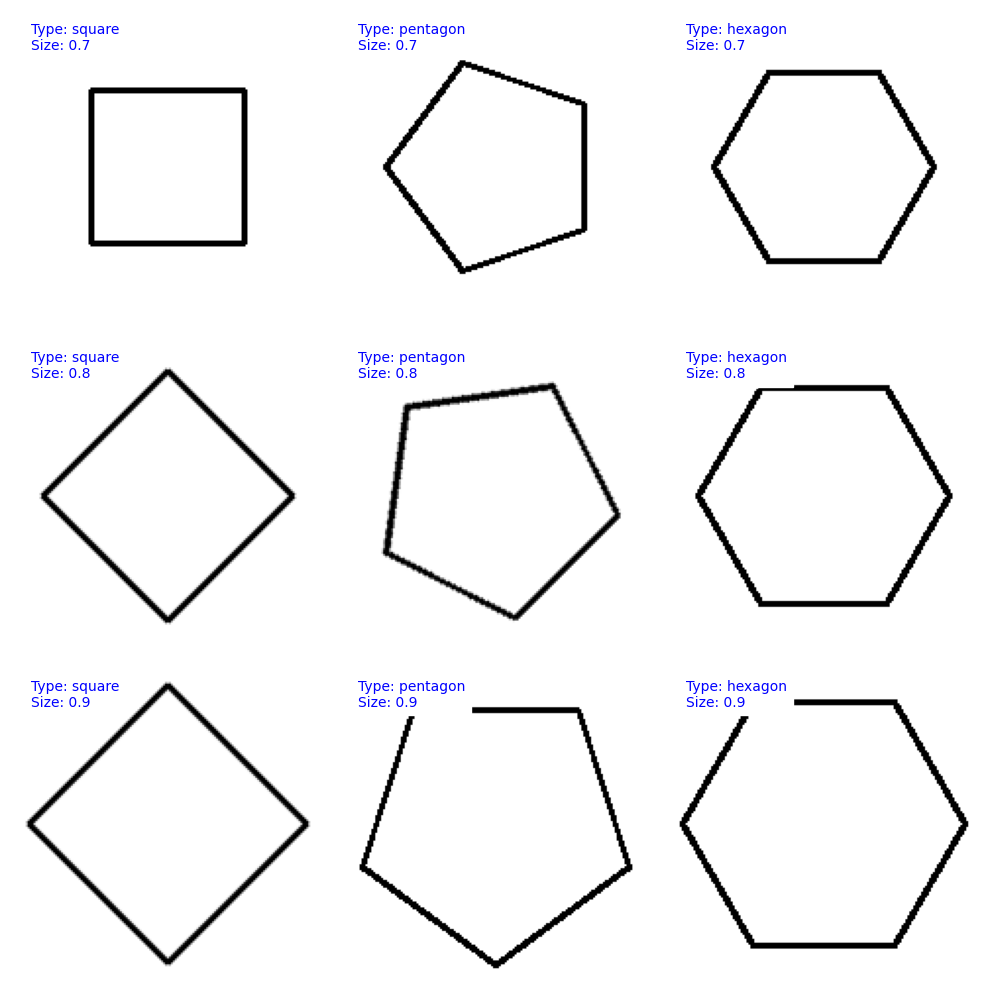

In [6]:
import sys
import os
sys.path.append('/Users/andylee/Projects/raven-cvpr/src/dataset')

from const import IMAGE_SIZE
from Attribute import Number, Position, Type, Uniformity
from AoT import Root, Structure, Component, Layout, Entity
from Rule import Progression
from rendering import render_panel
from build_tree import build_center_single
import matplotlib.pyplot as plt
import numpy as np
import copy

def create_raven_matrix():
    # Function to create a fully initialized panel with entity
    def create_panel_with_entity(type_level, size_level):
        panel = build_center_single()
        panel.is_pg = True
        
        # Access the structure elements
        structure = panel.children[0]
        component = structure.children[0]
        layout = component.children[0]
        
        # Setup position and number
        layout.number.value_level = 0  # One entity
        layout.position.sample(1)
        position_values = layout.position.get_value()
        
        # Create entity with specified attributes
        entity = Entity(name="0", bbox=position_values[0], entity_constraint=layout.entity_constraint)
        entity.type.value_level = type_level
        entity.size.value_level = size_level
        entity.color.value_level = 0  # Black
        layout.insert(entity)
        
        return panel
    
    # First, create all panels manually to ensure they have the right structure
    panels = []
    
    # Define the attribute progression
    type_levels = [2, 3, 4]  # Triangle, Square, Circle
    size_levels = [3, 4, 5]  # Small, Medium, Large
    
    # Create all 9 panels with the right attribute combinations
    for row in range(3):
        row_panels = []
        for col in range(3):
            panel = create_panel_with_entity(type_levels[col], size_levels[row])
            row_panels.append(panel)
        panels.append(row_panels)
    
    # Render the 3x3 matrix (using our manually created panels)
    fig, axs = plt.subplots(3, 3, figsize=(10, 10))
    
    for i in range(3):
        for j in range(3):
            panel_img = render_panel(panels[i][j])
            axs[i, j].imshow(panel_img, cmap='gray')
            axs[i, j].axis('off')
            
            # Label the attributes
            entity = panels[i][j].children[0].children[0].children[0].children[0]
            type_value = entity.type.get_value()
            size_value = entity.size.get_value()
            attr_text = f"Type: {type_value}\nSize: {size_value}"
            axs[i, j].text(10, 20, attr_text, color='blue', backgroundcolor='white')
    
    plt.tight_layout()
    plt.show()

# Run the example
create_raven_matrix()

# Proof of concept progression script

Generating progressions with different shapes...


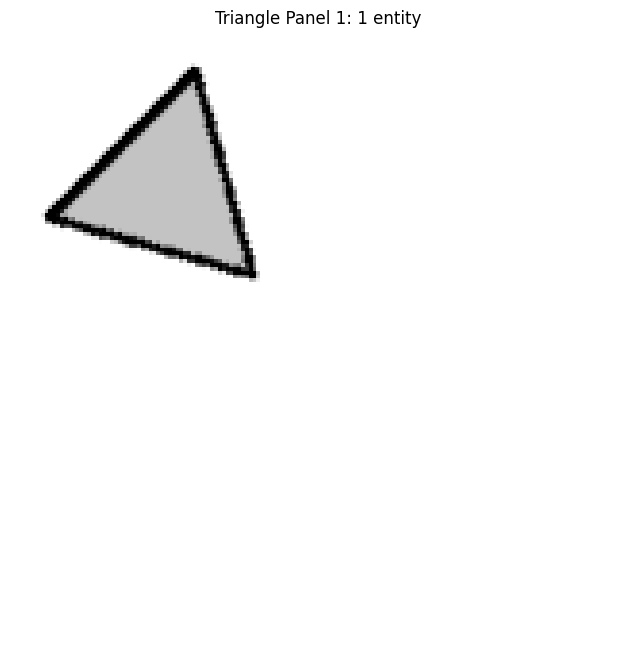

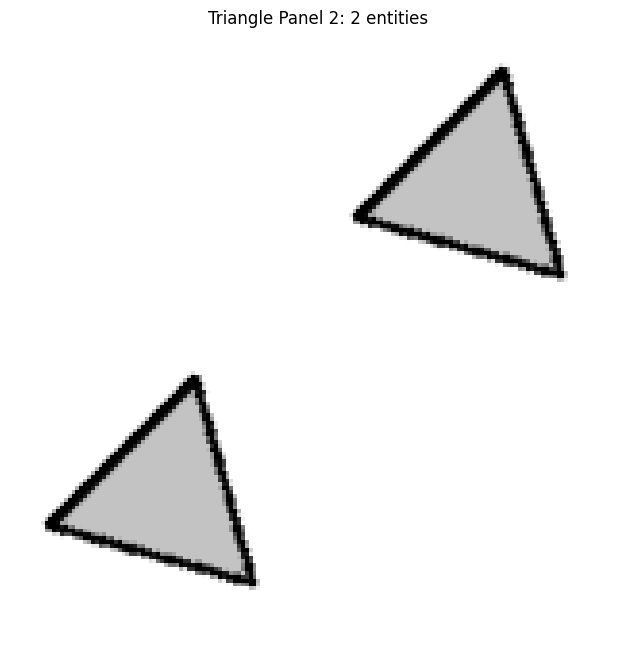

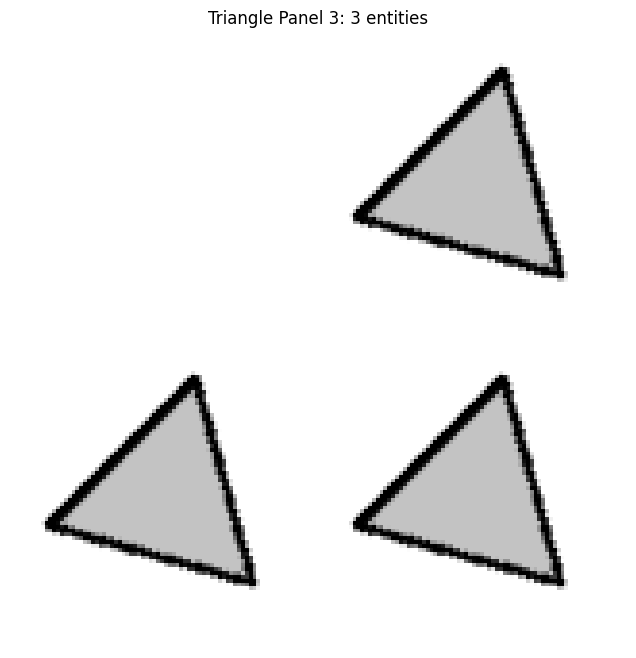

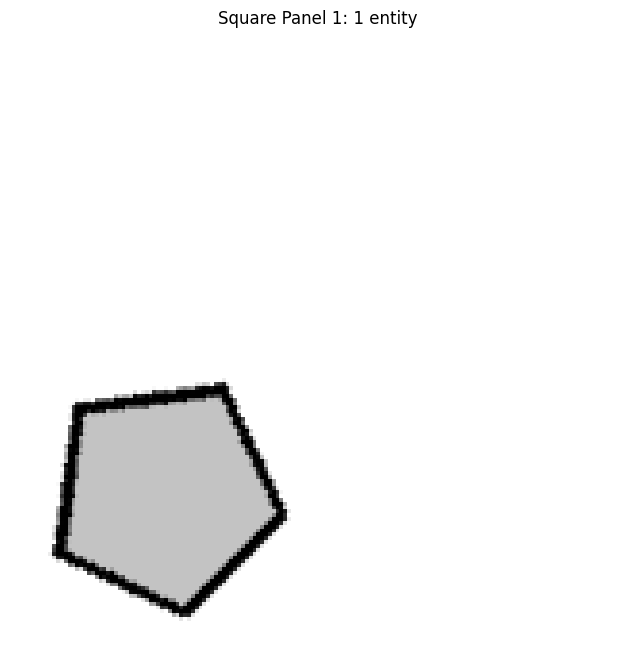

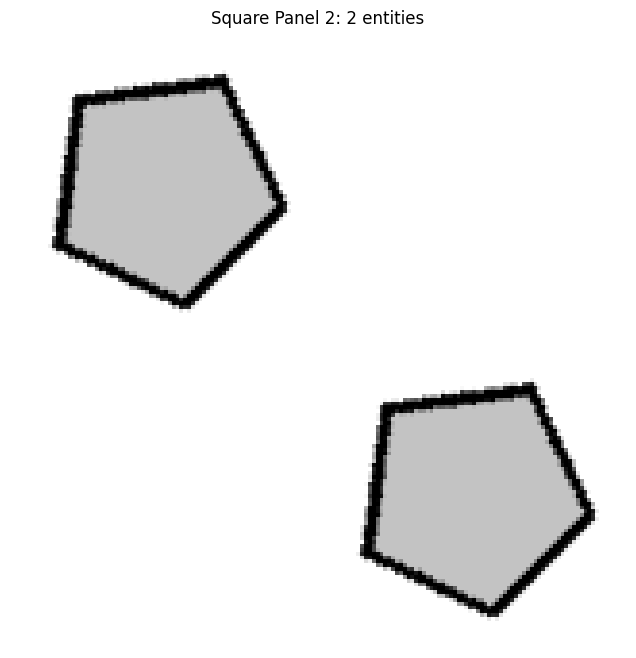

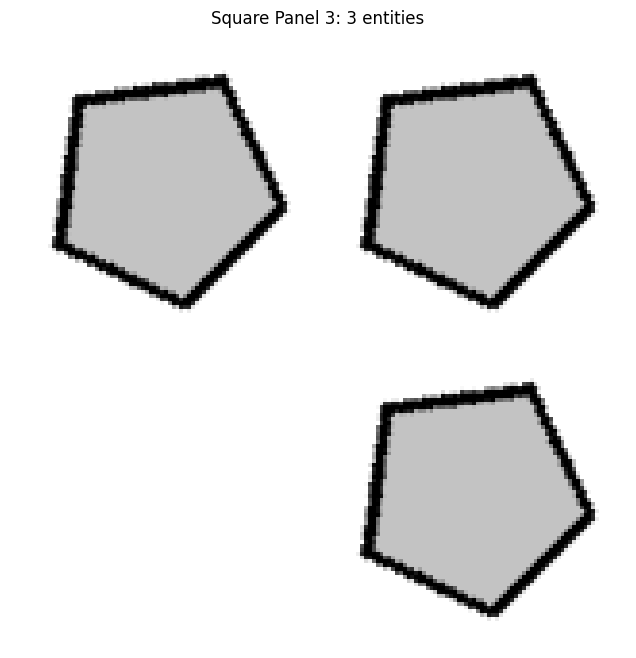

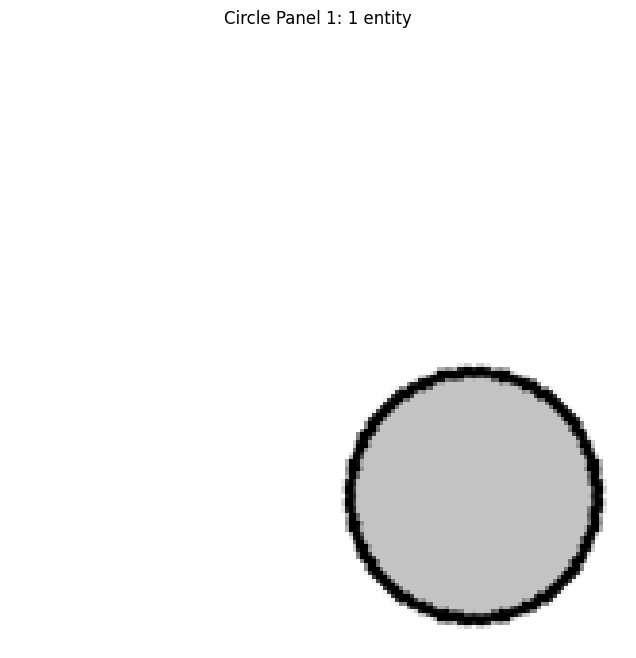

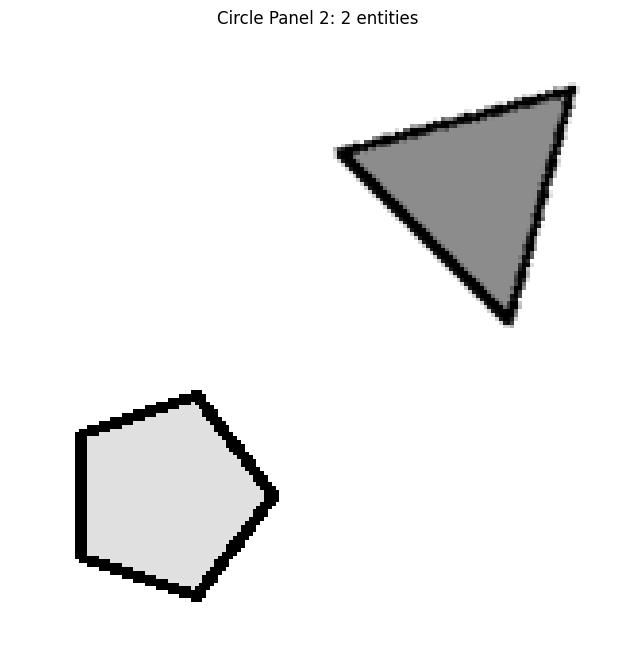

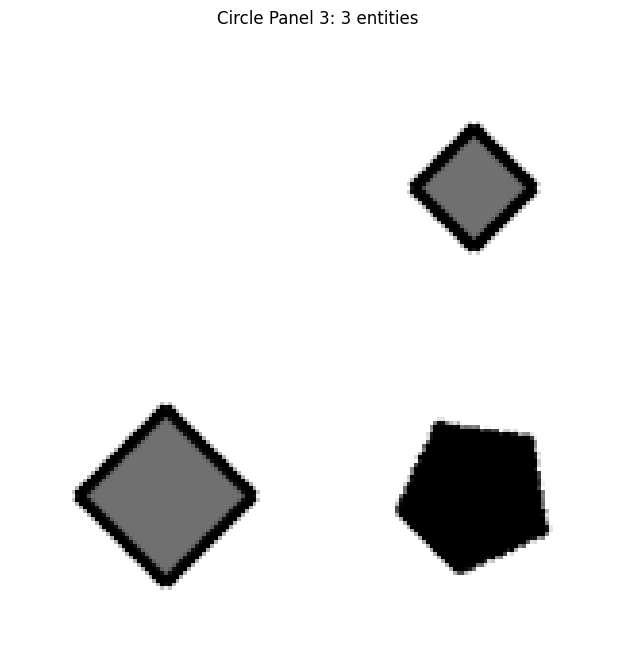

In [14]:
import sys
import os
import copy

# Add paths to access RAVEN modules
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
sys.path.append('/Users/andylee/Projects/raven-cvpr/src/dataset')

# Import necessary modules
from const import IMAGE_SIZE, NUM_VALUES
from Attribute import Number, Position, Type, Uniformity
from AoT import Root, Structure, Component, Layout, Entity
from Rule import Progression, Rule_Wrapper
from rendering import render_panel
from build_tree import build_distribute_four
import matplotlib.pyplot as plt
import numpy as np

def visualize_panel(panel, title=None):
    """Render and display a panel"""
    panel_img = render_panel(panel)
    plt.figure(figsize=(8, 8))
    plt.imshow(panel_img, cmap='gray')
    if title:
        plt.title(title)
    plt.axis('off')
    plt.show()

def create_entity(position_value, entity_constraint, type_value=1, size_value=4, color_value=2):
    """Create an entity with specified attributes"""
    entity = Entity(name="0", bbox=position_value, entity_constraint=entity_constraint)
    entity.type.value_level = type_value  # Controls shape
    entity.size.value_level = size_value  # Medium size
    entity.color.value_level = color_value  # Black
    return entity

def build_panel_with_entities(base_type, count=1, uniform=False):
    """Build a panel with a specific number of entities of the given type"""
    # Start with a panel that can hold multiple entities
    tree = build_distribute_four()
    tree.is_pg = True
    
    # Access the layout
    structure = tree.children[0]
    component = structure.children[0]
    layout = component.children[0]
    
    # Set number and position
    layout.number.value_level = count - 1  # Convert to 0-indexed
    layout.position.sample(layout.number.get_value())
    layout.uniformity.set_value_level(3 if uniform else 0)  # 3 = True, 0 = False (it's 3 b/c in sampling they want 25% chance to be the same)

    position_values = layout.position.get_value()
    
    # Add entities
    for i in range(count):
        position_value = position_values[i]
        entity = create_entity(position_value, layout.entity_constraint, type_value=base_type)
        layout.insert(entity)
    
    return tree

def generate_progression(base_type, max_count=3, uniform=False):
    """Generate a series of panels with 1, 2, 3 entities"""
    panels = []
    
    # Create first panel with 1 entity
    first_panel = build_panel_with_entities(base_type, 1, uniform)
    panels.append(first_panel)
    
    # Create subsequent panels by applying number progression rule
    current = first_panel
    number_rule = Rule_Wrapper("Progression", "Number", [1], 0)
    
    for i in range(1, max_count):
        next_panel = number_rule.apply_rule(current)
        panels.append(next_panel)
        current = next_panel
    
    return panels

def display_progression(panels, shape_name):
    """Display a progression of panels"""
    for i, panel in enumerate(panels):
        count = i + 1
        visualize_panel(panel, f"{shape_name} Panel {i+1}: {count} entit{'y' if count==1 else 'ies'}")

# Generate progressions for different shapes
def generate_proof_of_concept():
    print("Generating progressions with different shapes...")
    
    # Triangle progression (type_value=1)
    triangle_panels = generate_progression(base_type=1, uniform=True)
    display_progression(triangle_panels, "Triangle")
    
    # Square progression (type_value=2)
    square_panels = generate_progression(base_type=3, uniform=True)
    display_progression(square_panels, "Square")
    
    # Circle progression (type_value=5)
    circle_panels = generate_progression(base_type=5)
    display_progression(circle_panels, "Circle")

generate_proof_of_concept()